<a href="https://colab.research.google.com/github/nani0819/dictionary/blob/main/vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import timedelta

In [11]:
titles = ['new_cases_per_million', 'total_deaths_per_million', 'total_vaccinations_per_hundred']
df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'total_vaccinations_per_hundred'], 
    parse_dates=['date'])

countries = ['United States', 'Germany', 'United Kingdom', 'Israel', 'Japan', 'Brazil', 'India', 'Mongolia']
df = df[df['location'].isin(countries)]

In [12]:
pivot = pd.pivot_table(
    data=df,                                    # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values=titles[-1],    # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )

pivot = pivot.fillna(method='ffill')
pivot.head()

location,Brazil,Germany,India,Israel,Japan,Mongolia,United Kingdom,United States
date,,,,,,,,
2020-12-19,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2020-12-20,NaN,NaN,NaN,0.09,NaN,NaN,NaN,0.17
2020-12-21,NaN,NaN,NaN,0.37,NaN,NaN,NaN,0.18
2020-12-22,NaN,NaN,NaN,0.89,NaN,NaN,NaN,0.18
2020-12-23,NaN,NaN,NaN,1.61,NaN,NaN,NaN,0.30


In [13]:
import matplotlib.colors as pltc
import random
color = [k for k,v in pltc.cnames.items()]
main_country = 'Japan'
colors = {country:(color.pop(random.randint(0,len(color)-1)) if country!= main_country else '#129583') for country in countries}
print(colors)

# print(colors)
alphas = {country:(0.7 if country!= main_country else 1.0) for country in countries}

{'United States': 'royalblue', 'Germany': 'peachpuff', 'United Kingdom': 'aquamarine', 'Israel': 'hotpink', 'Japan': '#129583', 'Brazil': 'violet', 'India': 'forestgreen', 'Mongolia': 'ivory'}


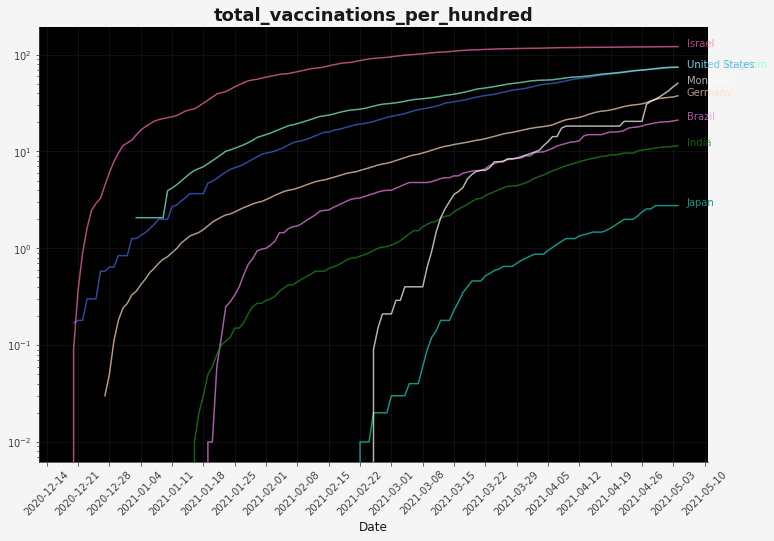

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('#F5F5F5')    # Change background color to a light grey
ax.patch.set_facecolor('#000000')     # Change background color to a light grey
# for title in titles:
for country in countries:
    ax.plot(
        pivot.index,              # What to use as your x-values
        pivot[country],           # What to use as your y-values
        color=colors[country],    # How to color your line
        alpha=alphas[country]     # What transparency to use for your line
    )
    ax.set_yscale('log')
    ax.text(
        x = pivot.index[-1] + timedelta(days=2),    # Where to position your text relative to the x-axis
        y = pivot[country].max(),                   # How high to position your text
        color = colors[country],                    # What color to give your text
        s = country,                                # What to write
        alpha=alphas[country]                       # What transparency to use
    )
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(0), interval=1))
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
# plt.ylim(0,100)

## B) Customizing axes and adding a grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#3f3f3f')
ax.spines['left'].set_color('#3f3f3f')
ax.tick_params(colors='#3f3f3f')
ax.grid(alpha=0.1)

## C) Adding a title and axis labels
# plt.ylabel(title, fontsize=12, alpha=0.9)
plt.xlabel('Date', fontsize=12, alpha=0.9)
plt.title(titles[-1], fontsize=18, weight='bold', alpha=0.9)

# D) Celebrate!
plt.show()

In [6]:
!pip install catboost

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics

import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

def set_date_features(df):
    df['month'] = pd.DatetimeIndex(df.index).month
    df['dayofweek'] = pd.DatetimeIndex(df.index).dayofweek
    return df

# one-hot encoding
def encoding(df):
    df = pd.get_dummies(df, columns=['month'], prefix='month')
    df = pd.get_dummies(df, columns=['dayofweek'], prefix='dayofweek')
    return df

def plot_result(train_y, test_y, y_hat, model_name, df, max):
  data = np.concatenate([train_y, test_y])
  data = data*max
  y_hat = y_hat*max
  plt.plot(df.index, data, label='Original')
  plt.plot(df.index[-len(y_hat):],y_hat, label=model_name)
  plt.legend()
  plt.grid()
  plt.show()

# prepare a dictionary of ml models
def get_models(models=dict()):
    # linear models
    normalize=False
    max_iter=5000
    models['lr'] = LinearRegression()
    models['lasso'] = Lasso()
    models['ridge'] = Ridge()
    models['en'] = ElasticNet()
    models['llars'] = LassoLars()
    # non-linear models
    models['knn'] = KNeighborsRegressor(n_neighbors=7)
    models['cart'] = DecisionTreeRegressor()
    models['extra'] = ExtraTreeRegressor()
    # # ensemble models
    n_trees = 10000
    models['bag'] = BaggingRegressor(n_estimators=n_trees)
    models['rf'] = RandomForestRegressor(n_estimators=n_trees, max_depth=10, random_state=10)
    models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
    # one by one target
    models['huber'] = HuberRegressor()
    models['pa'] = PassiveAggressiveRegressor(tol=1e-3)
    models['sgd'] = SGDRegressor(tol=1e-3)
    models['svmr'] = SVR()
    models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
    models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
    models['xgb'] = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0, n_estimators=n_trees, max_depth=6, n_jobs=-1, seed=10)
    models['cst'] = CatBoostRegressor(iterations=max_iter, task_type="GPU", devices='0', verbose=False)
    print('Defined %d models' % len(models))

    return models

def regression_results(y_true, y_pred):    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)    
    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

predicting  new_cases_per_million
Defined 19 models
           new_cases_per_million total_deaths_per_million  ... month dayofweek
location                   Japan                    Japan  ...                
date                                                       ...                
2021-02-17                11.552                   57.070  ...     2         2
2021-02-18                12.058                   57.671  ...     2         3
2021-02-19                10.255                   58.193  ...     2         4
2021-02-20                 9.757                   58.809  ...     2         5
2021-02-21                 8.191                   59.181  ...     2         6

[5 rows x 5 columns]
Maximum value:  62.573
Normalized value:  [0.18461637 0.19270292 0.16388858 0.15592987 0.13090311 0.09312323
 0.13937321 0.11423457 0.13697601 0.13355601 0.15415595 0.12598085
 0.08693846 0.11650392 0.1571924  0.14519042 0.14266537 0.05206719
 0.21758586 0.07846835 0.14846659 0.1590782  0.1646

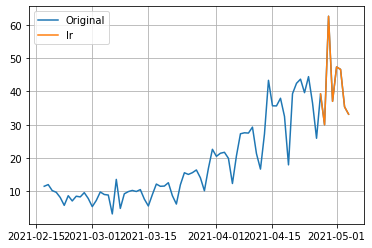



lasso Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Model 1 lasso MSE On validation Data:  0.040622684944642475
explained_variance:  0.7606
r2:  -0.6567
MAE:  0.1864
MSE:  0.0406
RMSE:  0.2016


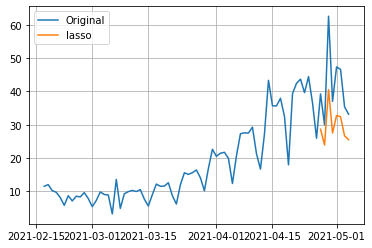



ridge Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Model 2 ridge MSE On validation Data:  1.0435294737502943e-08
explained_variance:  1.0
r2:  1.0
MAE:  0.0001
MSE:  0.0
RMSE:  0.0001


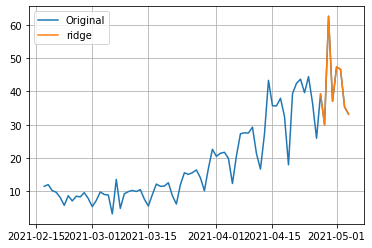



en ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Model 3 en MSE On validation Data:  0.010401381487808049
explained_variance:  0.9387
r2:  0.5758
MAE:  0.0943
MSE:  0.0104
RMSE:  0.102


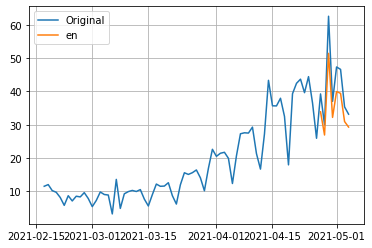



llars LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
Model 4 llars MSE On validation Data:  0.16971028753851372
explained_variance:  -0.0
r2:  -5.9214
MAE:  0.381
MSE:  0.1697
RMSE:  0.412


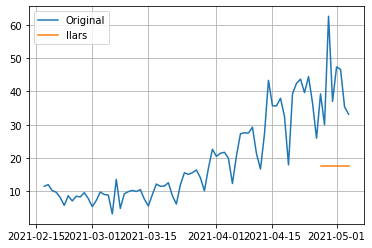



knn KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')
Model 5 knn MSE On validation Data:  0.016576775337967576
explained_variance:  0.4517
r2:  0.3239
MAE:  0.0795
MSE:  0.0166
RMSE:  0.1288


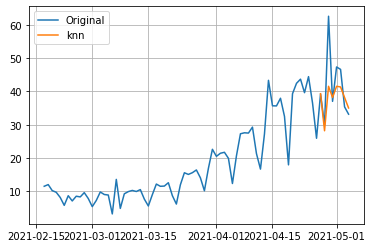



cart DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Model 6 cart MSE On validation Data:  0.011457277704987924
explained_variance:  0.649
r2:  0.5327
MAE:  0.0596
MSE:  0.0115
RMSE:  0.107


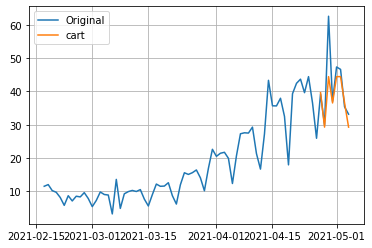



extra ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='random')
Model 7 extra MSE On validation Data:  0.011842230386362548
explained_variance:  0.6226
r2:  0.517
MAE:  0.0523
MSE:  0.0118
RMSE:  0.1088


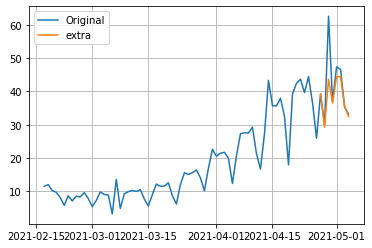



bag BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10000,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)
Model 8 bag MSE On validation Data:  0.012255632570856673
explained_variance:  0.5945
r2:  0.5002
MAE:  0.0561
MSE:  0.0123
RMSE:  0.1107


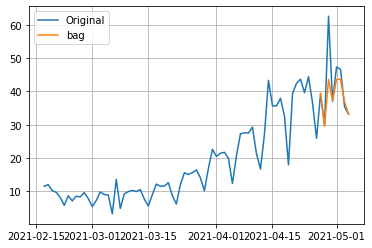



rf RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)
Model 9 rf MSE On validation Data:  0.012265325371688948
explained_variance:  0.5941
r2:  0.4998
MAE:  0.0561
MSE:  0.0123
RMSE:  0.1107


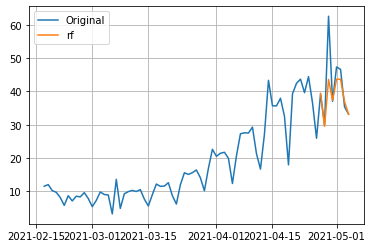



et ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=10000, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)
Model 10 et MSE On validation Data:  0.012155680243555922
explained_variance:  0.6236
r2:  0.5042
MAE:  0.0547
MSE:  0.0122
RMSE:  0.1103


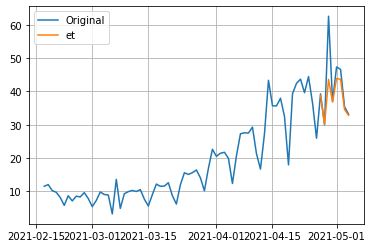



huber HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
Model 11 huber MSE On validation Data:  8.618125528701654e-12
explained_variance:  1.0
r2:  1.0
MAE:  0.0
MSE:  0.0
RMSE:  0.0


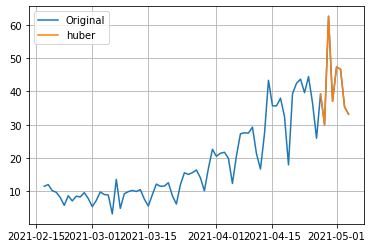



pa PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
Model 12 pa MSE On validation Data:  0.008941204305354649
explained_variance:  0.8747
r2:  0.6353
MAE:  0.0766
MSE:  0.0089
RMSE:  0.0946


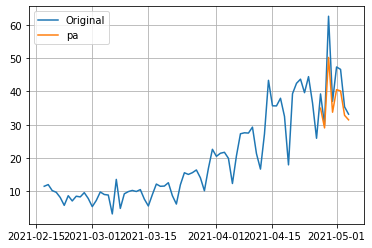



sgd SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Model 13 sgd MSE On validation Data:  3.105949369112041e+25
explained_variance:  -2.5637692673156314e+25
r2:  -1.2667240254037634e+27
MAE:  5516418148917.138
MSE:  3.105949369112041e+25
RMSE:  5573104493109.779


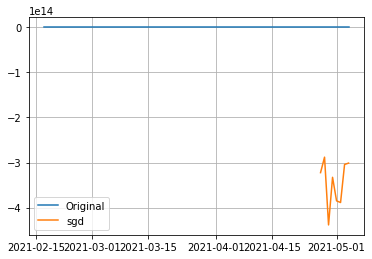



svmr SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Model 14 svmr MSE On validation Data:  0.01564118031264938
explained_variance:  0.6469
r2:  0.3621
MAE:  0.0836
MSE:  0.0156
RMSE:  0.1251


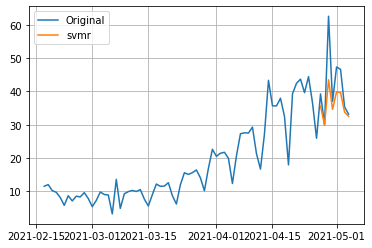



ada AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=10000, random_state=None)
Model 15 ada MSE On validation Data:  0.012851091992824297
explained_variance:  0.5885
r2:  0.4759
MAE:  0.0642
MSE:  0.0129
RMSE:  0.1134


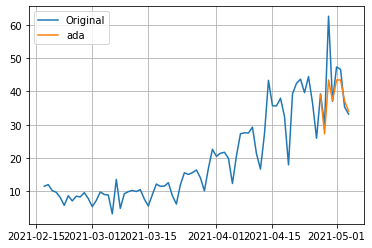



gbm GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Model 16 gbm MSE On validation Data:  0.011122571082073082
explained_variance:  0.6562
r2:  0.5464
MAE:  0.0543
MSE:  0.0111
RMSE:  0.1055


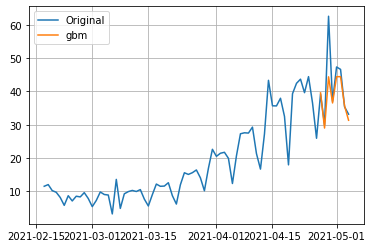



xgb XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
             silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)
[11:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 17 xgb MSE On validation Data:  0.011433240570275692
explained_variance:  0.6762
r2:  0.5337
MAE:  0.0591
MSE:  0.0114
RMSE:  0.1069


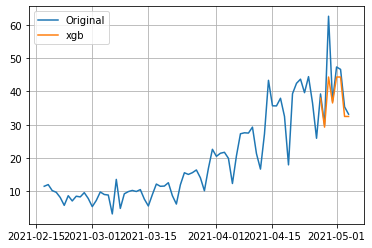



cst <catboost.core.CatBoostRegressor object at 0x7fd65e962350>
Model 18 cst MSE On validation Data:  0.019858013935037534
explained_variance:  0.4454
r2:  0.1901
MAE:  0.1011
MSE:  0.0199
RMSE:  0.1409


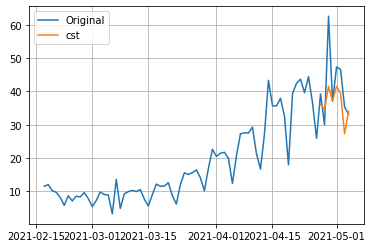

{'lr': 2.4591502649036963e-16, 'lasso': 0.20155070068010797, 'ridge': 0.00010215329038999646, 'en': 0.10198716334817852, 'llars': 0.41195908478696486, 'knn': 0.12875082655256073, 'cart': 0.10703867387532379, 'extra': 0.10882201241643415, 'bag': 0.1107051605430238, 'rf': 0.11074892943811668, 'et': 0.11025280152248251, 'huber': 2.93566441009555e-06, 'pa': 0.09455794152452056, 'sgd': 5573104493109.779, 'svmr': 0.12506470450390622, 'ada': 0.11336265695908991, 'gbm': 0.10546360074486875, 'xgb': 0.10692633244564077, 'cst': 0.14091846555734822}


In [8]:
split_ratio = 0.9                               # Training and Test data ratio ex: 0.9 -> 90% train 10% test
countries = ['Japan'] #['United States', 'Germany', 'United Kingdom', 'Israel', 'Japan', 'Brazil', 'India', 'Mongolia']
prediction = ['new_cases_per_million', 'total_deaths_per_million', 'total_vaccinations_per_hundred']
index = 0                                       # Which feature to "Predict"
print('predicting ', prediction[index])



models = get_models()                           # Loading models
df = pd.read_csv(                               # Loading data
      'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
      usecols=['date', 'location', 'new_cases_per_million', 'total_deaths_per_million', 'total_vaccinations_per_hundred'],     # Change data: copy and paste following list
      parse_dates=['date'])                     # ['new_cases_per_million', 'total_deaths_per_million', 'total_vaccinations_per_hundred']
df = df[df['location'].isin(countries)]
pivot = pd.pivot_table(
    data=df,                                    # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values=['new_cases_per_million', 'total_deaths_per_million', 'total_vaccinations_per_hundred'],    # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )

pivot = pivot.fillna(method='ffill')            # Preprocessing data
pivot = pivot.dropna()
pivot = set_date_features(pivot)
print(pivot.head())
# pivot = encoding(pivot)
df = pivot
pivot = pivot.to_numpy()

max = np.max(pivot[:,index])                        # Splitting data to train and test set
print('Maximum value: ',max)
train_X = pivot[:int(len(pivot)*split_ratio)]
test_X = pivot[int(len(pivot)*split_ratio):]
train_y = pivot[:int(len(pivot)*split_ratio), index]/max
test_y = pivot[int(len(pivot)*split_ratio):, index]/max
print('Normalized value: ', train_y, test_y)

print('Training and test data shapes: ', train_X.shape, train_y.shape, test_X.shape, test_y.shape)
scores_valid = {}
scores_test = {}
print('Training models ... ')                   # Training models
for idx, model_name in enumerate(models):
  print('\n===================================================================================\n')
  model = models[model_name]
  print(model_name, model)
  model.fit(train_X, train_y)
  y_hat = model.predict(test_X)
  scores_valid[model_name] = np.sqrt(mean_squared_error(test_y,y_hat))
  print('Model %i %s MSE On validation Data: '%(idx, model_name), mean_squared_error(test_y,y_hat))
  regression_results(test_y, y_hat)
  plot_result(train_y, test_y, y_hat, model_name, df, max)
print(scores_valid)